In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import ast
import numpy as np
from IPython.display import display, HTML

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('jikan_final.csv', low_memory=False)

In [4]:
df.dtypes

unique_id            int64
name_english        object
name                object
score              float64
ranked               int64
popularity           int64
members              int64
synopsis            object
synonyms            object
type_of             object
total_episodes     float64
premiered           object
studios             object
genres              object
demographic         object
duration_per_ep     object
rating              object
scored_by          float64
favorites            int64
aired               object
source              object
watching             int64
completed            int64
on_hold              int64
dropped             object
plan_to_watch        int64
total                int64
scored_10_by       float64
scored_9_by        float64
scored_8_by        float64
scored_7_by        float64
scored_6_by        float64
scored_5_by        float64
scored_4_by        float64
scored_3_by        float64
scored_2_by        float64
scored_1_by        float64
d

In [10]:
df.isnull().sum()

unique_id             0
name_english          0
name                  0
score              2694
ranked                0
popularity            0
members               0
synopsis              0
synonyms              0
type_of               0
total_episodes      127
premiered             0
studios               0
genres                0
demographic        9625
duration_per_ep       0
rating              208
scored_by          2694
favorites             0
aired                 0
source                0
watching              0
completed             0
on_hold               0
dropped               2
plan_to_watch         0
total                 0
scored_10_by          0
scored_9_by           0
scored_8_by           0
scored_7_by           0
scored_6_by           0
scored_5_by           0
scored_4_by           0
scored_3_by           0
scored_2_by           0
scored_1_by           0
dtype: int64

In [4]:
df = df.dropna(subset=['score'])

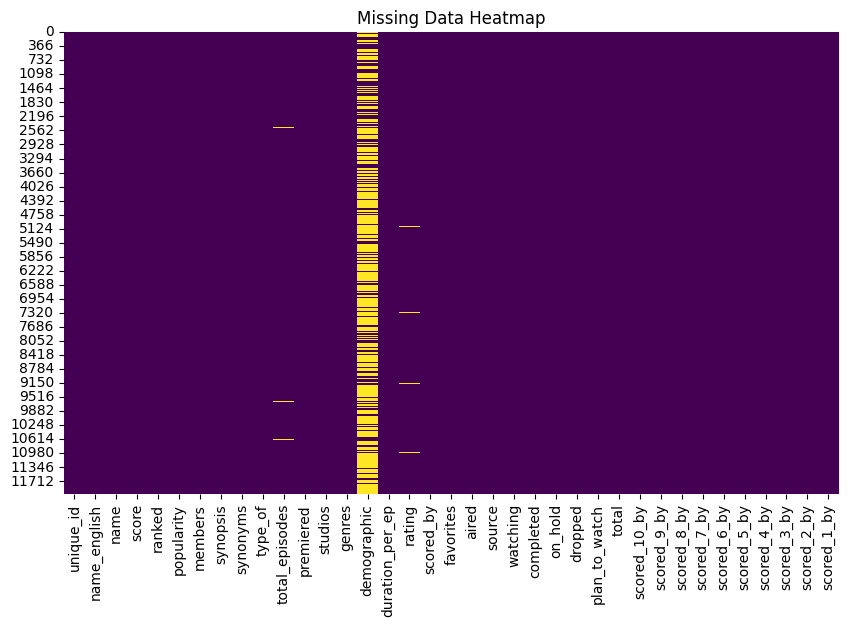

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [8]:
df.columns

Index(['unique_id', 'name_english', 'name', 'score', 'ranked', 'popularity',
       'members', 'synopsis', 'synonyms', 'type_of', 'total_episodes',
       'premiered', 'studios', 'genres', 'demographic', 'duration_per_ep',
       'rating', 'scored_by', 'favorites', 'aired', 'source', 'watching',
       'completed', 'on_hold', 'dropped', 'plan_to_watch', 'total',
       'scored_10_by', 'scored_9_by', 'scored_8_by', 'scored_7_by',
       'scored_6_by', 'scored_5_by', 'scored_4_by', 'scored_3_by',
       'scored_2_by', 'scored_1_by'],
      dtype='object')

In [7]:
duplicates = df.duplicated().sum()
print(f'Duplicates: {duplicates}')

Duplicates: 0


In [6]:
silinecek_kolonlar = ['synopsis', 'synonyms','scored_10_by', 'scored_9_by', 'scored_8_by', 'scored_7_by',
       'scored_6_by', 'scored_5_by', 'scored_4_by', 'scored_3_by','scored_2_by', 'scored_1_by']

# Kolonları sil
df = df.drop(columns=silinecek_kolonlar)

In [7]:
df = df.drop(columns=['name_english'])

In [8]:
df = df.drop(columns=['aired'])

In [9]:
df.columns

Index(['unique_id', 'name', 'score', 'ranked', 'popularity', 'members',
       'type_of', 'total_episodes', 'premiered', 'studios', 'genres',
       'demographic', 'duration_per_ep', 'rating', 'scored_by', 'favorites',
       'source', 'watching', 'completed', 'on_hold', 'dropped',
       'plan_to_watch', 'total'],
      dtype='object')

In [47]:
df.dtypes

unique_id            int64
name                object
score              float64
ranked               int64
popularity           int64
members              int64
type_of             object
total_episodes     float64
premiered           object
studios             object
genres              object
demographic         object
duration_per_ep     object
rating              object
scored_by          float64
favorites            int64
aired               object
source              object
watching             int64
completed            int64
on_hold              int64
dropped             object
plan_to_watch        int64
total                int64
dtype: object

In [45]:
columns_for_value_counts = ['unique_id','name', 'score', 'ranked', 'popularity',
       'members', 'type_of', 'total_episodes', 'premiered', 'studios',
       'genres', 'demographic', 'duration_per_ep', 'rating', 'scored_by',
       'favorites', 'aired', 'source', 'watching', 'completed', 'on_hold',
       'dropped', 'plan_to_watch', 'total']
for column in columns_for_value_counts:
    print('DF\n')
    print(df[column].value_counts(dropna=False))
    

DF

unique_id
0        1
8034     1
8025     1
8026     1
8027     1
        ..
4017     1
4018     1
4019     1
4020     1
12084    1
Name: count, Length: 12046, dtype: int64
DF

name
Saiyuuki Reload Gunlock                                   3
Senryuu Shoujo                                            3
Trinity Seven Movie 2: Heavens Library to Crimson Lord    3
BNA                                                       2
Toshokan Sensou: Koi no Shougai                           2
                                                         ..
Ensemble Stars!                                           1
Dinghai Fusheng Lu                                        1
Digimon Tamers: Boukensha-tachi no Tatakai                1
Battle Spirits: Shounen Gekiha Dan                        1
Wonder Momo                                               1
Name: count, Length: 11714, dtype: int64
DF

score
7.33    97
7.35    90
7.32    86
7.38    84
7.37    81
        ..
3.89     1
3.88     1
9.07     1
3.84 

In [46]:
df.head()

,unique_id,name,score,ranked,popularity,members,type_of,total_episodes,premiered,studios,...,scored_by,favorites,aired,source,watching,completed,on_hold,dropped,plan_to_watch,total
0,0,Ashita no Joe 2,8.73,50,3041,51773,TV,47.0,Fall 1980,Tokyo Movie Shinsha,...,20201.0,2653,"Oct 13, 1980 to Aug 31, 1981",Manga,2723,23933,1105,"1,205",22807,51773
1,1,Mushishi Zoku Shou 2nd Season,8.73,49,907,265728,TV,10.0,Fall 2014,Artland,...,106197.0,1475,"Oct 19, 2014 to Dec 21, 2014",Manga,14438,133486,6536,"3,332",107936,265728
2,2,Kingdom 4th Season,8.74,48,2731,63418,TV,26.0,Spring 2022,Pierrot,...,26633.0,1043,"Apr 10, 2022 to Oct 2, 2022",Manga,8497,29630,1084,688,23519,63418
3,3,Vinland Saga,8.75,47,77,1502303,TV,24.0,Summer 2019,Wit Studio,...,863875.0,47017,"Jul 8, 2019 to Dec 30, 2019",Manga,137792,1002257,39747,"22,421",300086,1502303
4,4,Cowboy Bebop,8.75,46,43,1857971,TV,26.0,Spring 1998,Sunrise,...,960699.0,82113,"Apr 3, 1998 to Apr 24, 1999",Original,172491,1073071,106423,"42,996",462990,1857971


In [9]:
value_counts = df['duration_per_ep'].value_counts()

# Grafiğin boyutunu artırma
plt.figure(figsize=(200, 30))

# Bar grafiği oluşturma
bars = value_counts.plot(kind='bar')

plt.title('Duration Tekrar Sayısı', fontsize=16)
plt.xlabel('Duration ', fontsize=12)
plt.ylabel('Tekrar Sayısı', fontsize=12)

# X ekseni etiketlerini 45 derece döndürme ve boyutunu ayarlama
plt.xticks(rotation=45, ha='right', fontsize=10)

# Çubukların üzerine değerleri yazma
for i, v in enumerate(value_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Alt kısımda yeterli boşluk bırakma
plt.tight_layout()

plt.show()

In [56]:
print(df['duration_per_ep'].value_counts(dropna=False))

duration_per_ep
24 min. per ep.          1902
23 min. per ep.          1466
25 min. per ep.           688
3 min. per ep.            278
23 min.                   225
                         ... 
56 min. per ep.             1
2 hr. 30 min.               1
1 hr. 15 min. per ep.       1
57 sec. per ep.             1
7 sec.                      1
Name: count, Length: 301, dtype: int64


In [20]:
threshold = 20

missing_values = df.isna().sum()
total_cells = len(df) * len(df.columns)
percent_missing = df.isnull().mean() * 100

columns_above_threshold = []

html_content = "<h3>Percentage of missing values in each column:</h3>"
html_content += "<table><tr><th>Column</th><th>Missing Percentage</th></tr>"

for col, percent in zip(missing_values.index, percent_missing):
    if percent > threshold:
        color = "red"
        columns_above_threshold.append(col)
    else:
        color = "green"
    html_content += f"<tr><td>{col}</td><td style='color:{color}'>{percent:.2f}%</td></tr>"

html_content += "</table>"

display(HTML(html_content))

print("\nColumns with more than", threshold, "% missing values:")
print(columns_above_threshold)

Column,Missing Percentage
unique_id,0.00%
name,0.00%
score,0.00%
ranked,0.00%
popularity,0.00%
members,0.00%
type_of,0.00%
total_episodes,0.40%
premiered,0.00%
studios,0.00%



Columns with more than 20 % missing values:
['demographic']


In [10]:
def convert_to_seconds(duration):
    seconds = 0
    
    # Saatleri kontrol et
    hr_match = re.search(r'(\d+)\s*hr', duration)
    if hr_match:
        seconds += int(hr_match.group(1)) * 3600
        
    # Dakikaları kontrol et
    min_match = re.search(r'(\d+)\s*min', duration)
    if min_match:
        seconds += int(min_match.group(1)) * 60
        
    # Saniyeleri kontrol et
    sec_match = re.search(r'(\d+)\s*sec', duration)
    if sec_match:
        seconds += int(sec_match.group(1))
        
    return seconds

# Uygula ve yeni kolon oluştur
df['duration_in_seconds'] = df['duration_per_ep'].apply(convert_to_seconds)

In [11]:
print(df['duration_in_seconds'].value_counts(dropna=False))

duration_in_seconds
1440     2107
1380     1691
1500      812
180       463
60        390
         ... 
9600        1
8220        1
18          1
10080       1
7           1
Name: count, Length: 203, dtype: int64


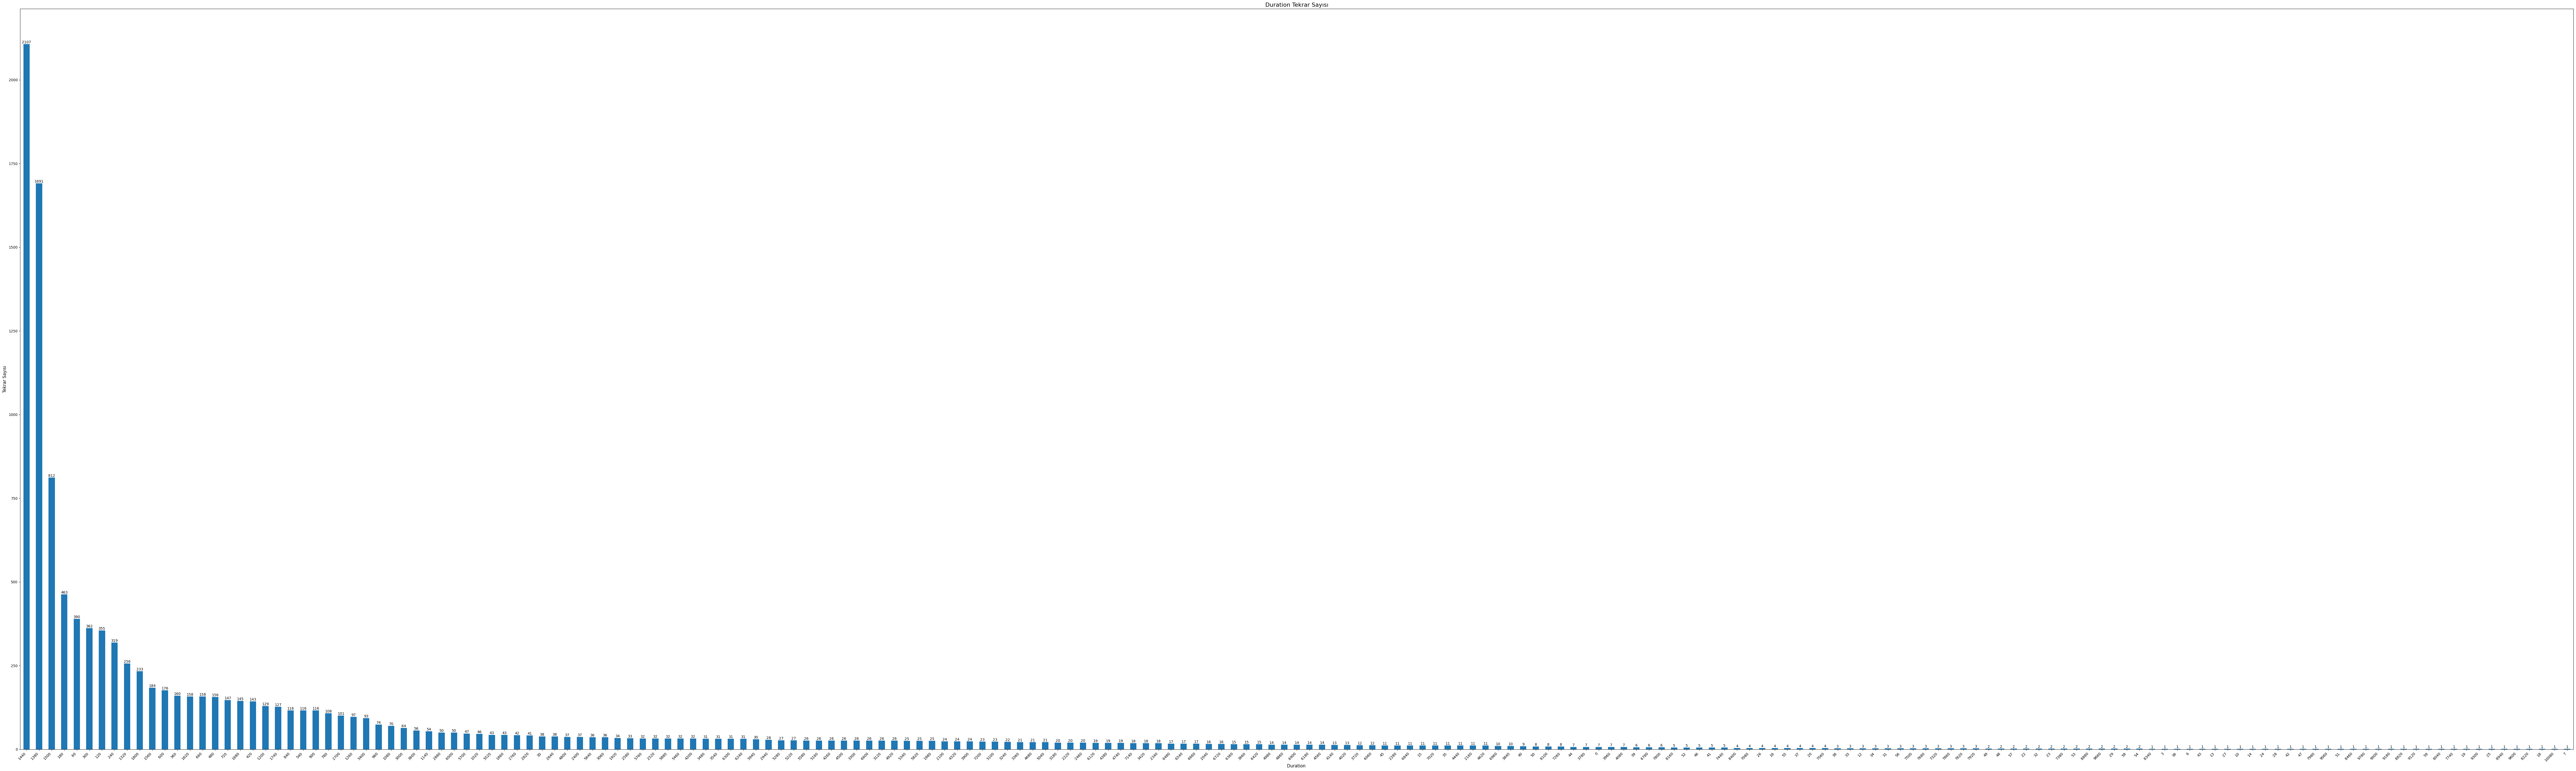

In [12]:
value_counts = df['duration_in_seconds'].value_counts()

# Grafiğin boyutunu artırma
plt.figure(figsize=(100, 30))

# Bar grafiği oluşturma
bars = value_counts.plot(kind='bar')

plt.title('Duration Tekrar Sayısı', fontsize=16)
plt.xlabel('Duration ', fontsize=12)
plt.ylabel('Tekrar Sayısı', fontsize=12)

# X ekseni etiketlerini 45 derece döndürme ve boyutunu ayarlama
plt.xticks(rotation=45, ha='right', fontsize=10)

# Çubukların üzerine değerleri yazma
for i, v in enumerate(value_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Alt kısımda yeterli boşluk bırakma
plt.tight_layout()

plt.show()

In [13]:
df['duration_in_seconds'].dtypes

dtype('int64')

In [15]:
threshold = 20

missing_values = df.isna().sum()
total_cells = len(df) * len(df.columns)
percent_missing = df.isnull().mean() * 100

columns_above_threshold = []

html_content = "<h3>Percentage of missing values in each column:</h3>"
html_content += "<table><tr><th>Column</th><th>Missing Percentage</th></tr>"

for col, percent in zip(missing_values.index, percent_missing):
    if percent > threshold:
        color = "red"
        columns_above_threshold.append(col)
    else:
        color = "green"
    html_content += f"<tr><td>{col}</td><td style='color:{color}'>{percent:.2f}%</td></tr>"

html_content += "</table>"

display(HTML(html_content))

print("\nColumns with more than", threshold, "% missing values:")
print(columns_above_threshold)

Column,Missing Percentage
unique_id,0.00%
name,0.00%
score,0.00%
ranked,0.00%
popularity,0.00%
members,0.00%
type_of,0.00%
total_episodes,0.40%
premiered,0.00%
studios,0.00%



Columns with more than 20 % missing values:
['demographic']


In [24]:
df.columns

Index(['unique_id', 'name', 'score', 'ranked', 'popularity', 'members',
       'type_of', 'total_episodes', 'premiered', 'studios', 'genres',
       'demographic', 'rating', 'scored_by', 'favorites', 'source', 'watching',
       'completed', 'on_hold', 'dropped', 'plan_to_watch', 'total',
       'duration_in_seconds_(-0.001, 480.0]',
       'duration_in_seconds_(480.0, 1380.0]',
       'duration_in_seconds_(1380.0, 1440.0]',
       'duration_in_seconds_(1440.0, 1800.0]',
       'duration_in_seconds_(1800.0, 10080.0]'],
      dtype='object')

In [25]:
df['genres'].head()

0    ['Historical', 'Sports', 'Josei', 'Drama', 'Ad...
1    ['Supernatural', 'Slice of Life', 'Action', 'A...
2    ['Historical', 'Sports', 'Action', 'Drama', 'S...
3    ['Fantasy', 'Historical', 'Adventure', 'Action...
4    ['Seinen', 'Action', 'Award Winning', 'Science...
Name: genres, dtype: object

In [13]:
def safe_eval(x):
    if pd.isna(x):
        return []
    try:
        return ast.literal_eval(x)
    except:
        return []

df['genres'] = df['genres'].apply(safe_eval)

# Tüm unique genre'leri bul
all_genres = set()
for genres in df['genres']:
    all_genres.update(genres)

# Her bir genre için yeni bir sütun oluştur
for genre in all_genres:
    df[f'{genre}_Genres'] = df['genres'].apply(lambda x: genre in x)

# Boolean değerleri 0 ve 1'e dönüştür
for genre in all_genres:
    df[f'{genre}_Genres'] = df[f'{genre}_Genres'].astype(int)





In [14]:
df = df.drop(columns=['genres'])

In [18]:
df.columns

Index(['unique_id', 'name', 'score', 'ranked', 'popularity', 'members',
       'type_of', 'total_episodes', 'premiered', 'studios', 'demographic',
       'duration_per_ep', 'rating', 'scored_by', 'favorites', 'source',
       'watching', 'completed', 'on_hold', 'dropped', 'plan_to_watch', 'total',
       'duration_in_seconds', 'Adventure_Genres', 'Award Winning_Genres',
       'Music_Genres', 'Avant Garde_Genres', 'Cyberpunk_Genres',
       'Sports_Genres', 'Martial Arts_Genres', 'Horror_Genres',
       'Post-Apocalyptic_Genres', 'Ecchi_Genres', 'Fantasy_Genres',
       'Psychological_Genres', 'Historical_Genres', 'Action_Genres',
       'Drama_Genres', 'School_Genres', 'Supernatural_Genres', 'Seinen_Genres',
       'Girls Love_Genres', 'Shoujo_Genres', 'Suspense_Genres', 'Harem_Genres',
       'Shounen_Genres', 'Gourmet_Genres', 'Thriller_Genres', 'Sci-Fi_Genres',
       'Comedy_Genres', 'Mecha_Genres', 'Mystery_Genres', 'Isekai_Genres',
       'Romance_Genres', 'Boys Love_Genres', 'J

In [15]:
def preprocess_data(df):
    # Kategorik sütunları belirleme
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    # Kategorik sütunları kodlama
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = df[col].astype(str)  # NaN değerleri de bir kategori olarak ele al
        df[col] = le.fit_transform(df[col])
    
    return df

def impute_data(df):
    # Sütunları eksiklik oranlarına göre gruplama
    mostly_empty_cols = ['rating','demographic']
    float_93_cols = ['total_episodes']
    full_cols = [ 'premiered', 'studios','unique_id', 'name', 'score', 'ranked', 'popularity', 'members',
       'type_of','scored_by', 'favorites', 'source', 'watching',
       'completed', 'on_hold', 'dropped', 'plan_to_watch', 'total',
       'duration_in_seconds_(-0.001, 480.0]',
       'duration_in_seconds_(480.0, 1380.0]',
       'duration_in_seconds_(1380.0, 1440.0]',
       'duration_in_seconds_(1440.0, 1800.0]',
       'duration_in_seconds_(1800.0, 10080.0]', 'Boys Love_Genres',
       'Award Winning_Genres', 'Historical_Genres', 'Mecha_Genres',
       'Martial Arts_Genres', 'Psychological_Genres', 'Seinen_Genres',
       'Drama_Genres', 'Cyberpunk_Genres', 'Slice of Life_Genres',
       'Shounen_Genres', 'Action_Genres', 'Comedy_Genres', 'Shoujo_Genres',
       'Josei_Genres', 'Music_Genres', 'Avant Garde_Genres', 'Sci-Fi_Genres',
       'Sports_Genres', 'Post-Apocalyptic_Genres', 'Gourmet_Genres',
       'Girls Love_Genres', 'Science Fiction_Genres', 'Harem_Genres',
       'Adventure_Genres', 'Horror_Genres', 'Mystery_Genres',
       'Supernatural_Genres', 'Romance_Genres', 'Thriller_Genres',
       'Fantasy_Genres', 'Ecchi_Genres', 'Isekai_Genres', 'School_Genres',
       'Suspense_Genres','premiered', 'studios','unique_id', 'name', 'score', 'ranked', 'popularity', 'members',
       'type_of']
    
    # Çok boş olan object sütunları için mod ile doldurma
    for col in mostly_empty_cols:
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)
    
    # %93 boş olan float sütunları için IterativeImputer kullanma
    float_93_imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10), 
                                        max_iter=10, random_state=42)
    df[float_93_cols] = float_93_imputer.fit_transform(df[float_93_cols])
    
    return df

# Ana işlem
def main(df):
    # Veri setini ön işleme
    data_processed = preprocess_data(df.copy())
    
    # Eksik değerleri doldurma
    data_imputed = impute_data(data_processed)
    
    # Sonuçları gösterme
    for col in df.columns:
        missing_before = df[col].isnull().sum()
        missing_after = data_imputed[col].isnull().sum()
        print(f"{col}:")
        print(f"  Önceki eksik değer sayısı: {missing_before}")
        print(f"  Sonraki eksik değer sayısı: {missing_after}")
        print(f"  Önceki benzersiz değer sayısı: {df[col].nunique()}")
        print(f"  Sonraki benzersiz değer sayısı: {data_imputed[col].nunique()}")
        print()
    
    # Eğitimden sonra bulunan verileri df'e yerleştirme
    df.update(data_imputed)
    
    return df

# Kodu çalıştırma
# df'in tanımlı olduğunu varsayıyoruz
df_imputed = main(df)

# Sonuçları kontrol etme
print("Güncellenmiş df'in boyutu:", df_imputed.shape)
print("\nİlk birkaç satır:")
print(df_imputed.head())

unique_id:
  Önceki eksik değer sayısı: 0
  Sonraki eksik değer sayısı: 0
  Önceki benzersiz değer sayısı: 12046
  Sonraki benzersiz değer sayısı: 12046

name:
  Önceki eksik değer sayısı: 0
  Sonraki eksik değer sayısı: 0
  Önceki benzersiz değer sayısı: 11714
  Sonraki benzersiz değer sayısı: 11714

score:
  Önceki eksik değer sayısı: 0
  Sonraki eksik değer sayısı: 0
  Önceki benzersiz değer sayısı: 541
  Sonraki benzersiz değer sayısı: 541

ranked:
  Önceki eksik değer sayısı: 0
  Sonraki eksik değer sayısı: 0
  Önceki benzersiz değer sayısı: 11690
  Sonraki benzersiz değer sayısı: 11690

popularity:
  Önceki eksik değer sayısı: 0
  Sonraki eksik değer sayısı: 0
  Önceki benzersiz değer sayısı: 9950
  Sonraki benzersiz değer sayısı: 9950

members:
  Önceki eksik değer sayısı: 0
  Sonraki eksik değer sayısı: 0
  Önceki benzersiz değer sayısı: 9498
  Sonraki benzersiz değer sayısı: 9498

type_of:
  Önceki eksik değer sayısı: 0
  Sonraki eksik değer sayısı: 0
  Önceki benzersiz değer 

In [16]:
threshold = 20

missing_values = df.isna().sum()
total_cells = len(df) * len(df.columns)
percent_missing = df.isnull().mean() * 100

columns_above_threshold = []

html_content = "<h3>Percentage of missing values in each column:</h3>"
html_content += "<table><tr><th>Column</th><th>Missing Percentage</th></tr>"

for col, percent in zip(missing_values.index, percent_missing):
    if percent > threshold:
        color = "red"
        columns_above_threshold.append(col)
    else:
        color = "green"
    html_content += f"<tr><td>{col}</td><td style='color:{color}'>{percent:.2f}%</td></tr>"

html_content += "</table>"

display(HTML(html_content))

print("\nColumns with more than", threshold, "% missing values:")
print(columns_above_threshold)

Column,Missing Percentage
unique_id,0.00%
name,0.00%
score,0.00%
ranked,0.00%
popularity,0.00%
members,0.00%
type_of,0.00%
total_episodes,0.00%
premiered,0.00%
studios,0.00%



Columns with more than 20 % missing values:
[]


In [35]:
df.dtypes

unique_id                    int64
name                        object
score                      float64
ranked                       int64
popularity                   int64
members                      int64
type_of                     object
total_episodes             float64
premiered                   object
studios                     object
demographic                 object
duration_per_ep             object
rating                      object
scored_by                  float64
favorites                    int64
source                      object
watching                     int64
completed                    int64
on_hold                      int64
dropped                     object
plan_to_watch                int64
total                        int64
duration_in_seconds         object
Martial Arts_Genres          int32
Adventure_Genres             int32
Suspense_Genres              int32
Seinen_Genres                int32
Shoujo_Genres                int32
Ecchi_Genres        

In [17]:
df = df.drop(columns=['unique_id'])
df = df.drop(columns=['name'])


In [35]:
df.select_dtypes(include=['object']).columns.tolist()

['type_of',
 'premiered',
 'studios',
 'demographic',
 'duration_per_ep',
 'rating',
 'source',
 'dropped']

In [18]:
ohe=OneHotEncoder()
xd=ohe.fit_transform(df[['type_of',
 'premiered',
 'studios',
 'demographic',
 'duration_per_ep',
 'rating',
 'source',
 'dropped']]).toarray()

In [19]:
ohe.get_feature_names_out()

array(['type_of_0', 'type_of_1', 'type_of_2', ..., 'dropped_3738',
       'dropped_3739', 'dropped_3740'], dtype=object)

In [20]:
xd=pd.DataFrame(xd)

In [21]:
xd.columns=ohe.get_feature_names_out()

In [22]:
df=df.drop(columns=['type_of',
 'premiered',
 'studios',
 'demographic',
 'duration_per_ep',
 'rating',
 'source',
 'dropped'])

In [23]:
df[xd.columns]=xd

C:\Users\asus\AppData\Local\Temp\ipykernel_35004\3241537394.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[xd.columns]=xd
C:\Users\asus\AppData\Local\Temp\ipykernel_35004\3241537394.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[xd.columns]=xd
C:\Users\asus\AppData\Local\Temp\ipykernel_35004\3241537394.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) 

In [45]:
df.columns

Index(['score', 'ranked', 'popularity', 'members', 'total_episodes',
       'scored_by', 'favorites', 'watching', 'completed', 'on_hold',
       ...
       'dropped_3731', 'dropped_3732', 'dropped_3733', 'dropped_3734',
       'dropped_3735', 'dropped_3736', 'dropped_3737', 'dropped_3738',
       'dropped_3739', 'dropped_3740'],
      dtype='object', length=5047)

In [46]:
df.dtypes

score             float64
ranked              int64
popularity          int64
members             int64
total_episodes    float64
                   ...   
dropped_3736      float64
dropped_3737      float64
dropped_3738      float64
dropped_3739      float64
dropped_3740      float64
Length: 5047, dtype: object

In [53]:
float_columns = df.select_dtypes(include=['float']).columns.tolist()
float_count = len(float_columns)

# Int kolonları alma
int_columns = df.select_dtypes(include=['int']).columns.tolist()
int_count = len(int_columns)
print(f"Toplam float kolon sayısı: {float_count}, İsimleri: {float_columns}")
print(f"Toplam int kolon sayısı: {int_count}, İsimleri: {int_columns}")

Toplam float kolon sayısı: 5002, İsimleri: ['score', 'total_episodes', 'scored_by', 'type_of_0', 'type_of_1', 'type_of_2', 'type_of_3', 'type_of_4', 'type_of_5', 'premiered_0', 'premiered_1', 'premiered_2', 'premiered_3', 'premiered_4', 'premiered_5', 'premiered_6', 'premiered_7', 'premiered_8', 'premiered_9', 'premiered_10', 'premiered_11', 'premiered_12', 'premiered_13', 'premiered_14', 'premiered_15', 'premiered_16', 'premiered_17', 'premiered_18', 'premiered_19', 'premiered_20', 'premiered_21', 'premiered_22', 'premiered_23', 'premiered_24', 'premiered_25', 'premiered_26', 'premiered_27', 'premiered_28', 'premiered_29', 'premiered_30', 'premiered_31', 'premiered_32', 'premiered_33', 'premiered_34', 'premiered_35', 'premiered_36', 'premiered_37', 'premiered_38', 'premiered_39', 'premiered_40', 'premiered_41', 'premiered_42', 'premiered_43', 'premiered_44', 'premiered_45', 'premiered_46', 'premiered_47', 'premiered_48', 'premiered_49', 'premiered_50', 'premiered_51', 'premiered_52', 

In [49]:
df.head()

,score,ranked,popularity,members,type_of,total_episodes,premiered,studios,demographic,duration_per_ep,...,Josei_Genres,Supernatural_Genres,Isekai_Genres,Cyberpunk_Genres,Girls Love_Genres,Music_Genres,School_Genres,Avant Garde_Genres,Post-Apocalyptic_Genres,Psychological_Genres
0,8.73,50,3041,51773,4,47.0,16,604,4,160,...,1,0,0,0,0,0,0,0,0,0
1,8.73,49,907,265728,4,10.0,50,53,2,156,...,0,1,0,0,0,0,0,0,0,0
2,8.74,48,2731,63418,4,26.0,118,387,2,160,...,0,0,0,0,0,0,0,0,0,0
3,8.75,47,77,1502303,4,24.0,169,644,2,160,...,0,0,0,0,0,0,0,0,0,0
4,8.75,46,43,1857971,4,26.0,94,562,5,160,...,0,0,0,0,0,0,0,0,0,0


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Veriyi ön işleme
X = df.drop('score', axis=1)  # Bağımsız değişkenler
y = df['score']  # Hedef değişken

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi ölçeklendirme (Decision Tree için gerekli değil, ancak karşılaştırma için bırakıldı)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Model seçme ve oluşturma (Decision Tree Regressor)
model = DecisionTreeRegressor(random_state=42)

# 4. Modeli eğitme
model.fit(X_train_scaled, y_train)

# 5. Modeli değerlendirme
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.00019091286307053944
R-squared Score: 0.9997698071010049


In [25]:
from sklearn.mixture import GaussianMixture

In [26]:
features = ['ranked', 'popularity', 'members', 'favorites', 'watching', 'completed', 'on_hold', 'plan_to_watch', 'total', 'duration_in_seconds']
A = df[features]

In [27]:
scaler = StandardScaler()
A_scaled = scaler.fit_transform(A)

In [28]:
n_components_range = range(1, 11)
bic = []
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(A_scaled)
    bic.append(gmm.bic(A_scaled))

optimal_n_components = n_components_range[np.argmin(bic)]
print(f"Optimal number of components: {optimal_n_components}")

Optimal number of components: 10


In [29]:
gmm = GaussianMixture(n_components=optimal_n_components, random_state=42)
gmm.fit(A_scaled)

GaussianMixture(n_components=10, random_state=42)

In [30]:
labels = gmm.predict(A_scaled)
df['Cluster'] = labels

C:\Users\asus\AppData\Local\Temp\ipykernel_35004\1007403647.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Cluster'] = labels


In [31]:
cluster_means = scaler.inverse_transform(gmm.means_)
for i, mean in enumerate(cluster_means):
    print(f"Cluster {i} mean:")
    for j, feature in enumerate(features):
        print(f"  {feature}: {mean[j]:.2f}")

Cluster 0 mean:
  ranked: 5537.00
  popularity: 5252.85
  members: 18571.68
  favorites: 45.40
  watching: 982.94
  completed: 9904.30
  on_hold: 553.13
  plan_to_watch: 6263.78
  total: 18571.68
  duration_in_seconds: 1158.10
Cluster 1 mean:
  ranked: 944.53
  popularity: 236.02
  members: 933959.00
  favorites: 16490.13
  watching: 70293.06
  completed: 628611.85
  on_hold: 25342.17
  plan_to_watch: 182608.66
  total: 933959.00
  duration_in_seconds: 1823.14
Cluster 2 mean:
  ranked: 2843.70
  popularity: 1294.63
  members: 198499.02
  favorites: 1126.10
  watching: 12774.76
  completed: 119722.63
  on_hold: 5179.50
  plan_to_watch: 53444.01
  total: 198499.02
  duration_in_seconds: 2019.79
Cluster 3 mean:
  ranked: 9911.81
  popularity: 13713.47
  members: 1136.80
  favorites: 1.51
  watching: 56.63
  completed: 547.86
  on_hold: 28.08
  plan_to_watch: 420.15
  total: 1136.80
  duration_in_seconds: 1380.28
Cluster 4 mean:
  ranked: 428.99
  popularity: 80.94
  members: 1646995.45
  

In [32]:
for i, covariance in enumerate(gmm.covariances_):
    print(f"Cluster {i} covariance matrix:")
    print(covariance)
    print()



Cluster 0 covariance matrix:
[[ 6.24678216e-01  3.86727698e-03 -9.02246924e-04 -1.80348808e-03
   2.05721670e-03 -3.54763840e-03 -1.36256567e-04  1.55698906e-03
  -9.02246924e-04 -7.25763728e-02]
 [ 3.86727698e-03  4.31615300e-02 -6.56087047e-03 -2.07504352e-04
  -1.49909296e-03 -5.56904543e-03 -4.53340170e-03 -1.08839331e-02
  -6.56087047e-03  3.30047223e-04]
 [-9.02246924e-04 -6.56087047e-03  1.16578587e-03  3.97411453e-05
   3.57586805e-04  9.79864017e-04  8.51965502e-04  1.89492290e-03
   1.16478587e-03 -4.70686693e-04]
 [-1.80348808e-03 -2.07504352e-04  3.97411453e-05  3.94663778e-05
   7.16770251e-05 -1.91309758e-07  1.29099343e-04  1.39221044e-04
   3.97411453e-05  3.66603591e-04]
 [ 2.05721670e-03 -1.49909296e-03  3.57586805e-04  7.16770251e-05
   7.62189143e-04 -1.09630405e-05  8.85786629e-04  1.11854119e-03
   3.57586805e-04 -2.57576010e-04]
 [-3.54763840e-03 -5.56904543e-03  9.79864017e-04 -1.91309758e-07
  -1.09630405e-05  1.11844632e-03  2.26127978e-04  8.54116999e-04
   9

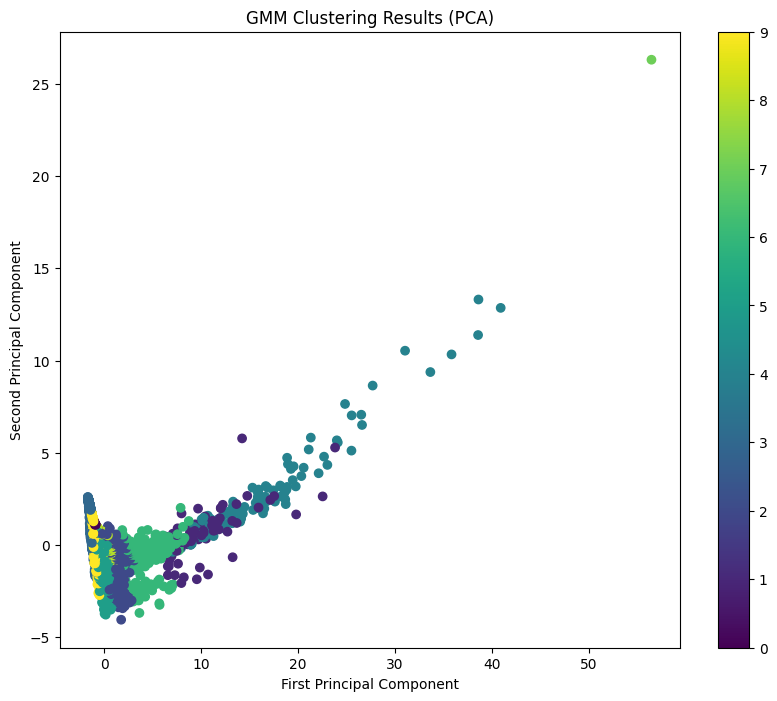

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
A_pca = pca.fit_transform(A_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(A_pca[:, 0], A_pca[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.title('GMM Clustering Results (PCA)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [34]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(A_scaled, labels)
print(f"The average silhouette score is: {silhouette_avg}")

The average silhouette score is: 0.09887589534370753


In [35]:
from sklearn.cluster import KMeans

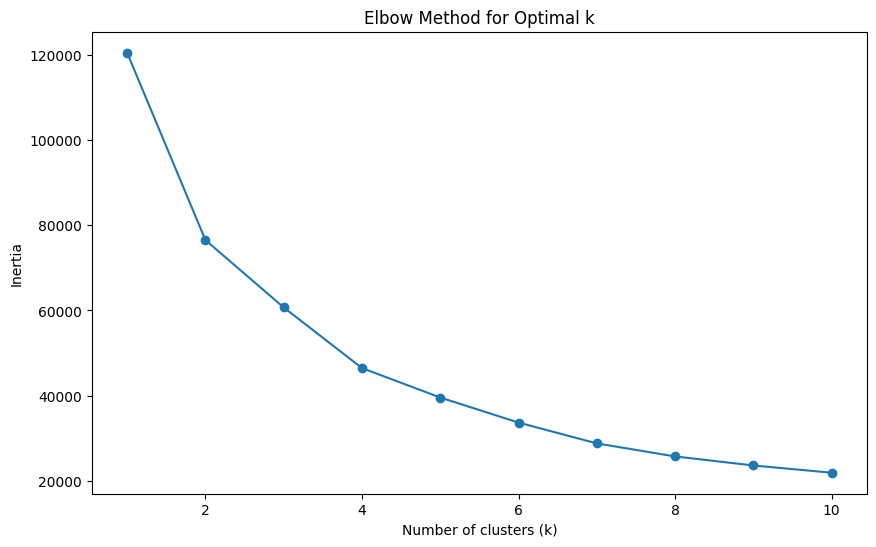

In [36]:
def elbow_method(A, max_k):
    inertias = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(A)
        inertias.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k+1), inertias, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.show()

# Elbow Yöntemi'ni uygula
elbow_method(A_scaled, 10)
optimal_k = 3  # Bu değeri grafiğe göre ayarlayın

In [37]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(A_scaled)

KMeans(n_clusters=3, random_state=42)

In [38]:
labels = kmeans.labels_
df['Cluster1'] = labels

C:\Users\asus\AppData\Local\Temp\ipykernel_35004\1135744981.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Cluster1'] = labels


In [39]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
for i, center in enumerate(cluster_centers):
    print(f"Cluster1 {i} center:")
    for j, feature in enumerate(features):
        print(f"  {feature}: {center[j]:.2f}")

Cluster1 0 center:
  ranked: 6913.09
  popularity: 8277.67
  members: 24475.03
  favorites: 85.57
  watching: 1380.74
  completed: 14315.03
  on_hold: 619.94
  plan_to_watch: 7153.91
  total: 24475.03
  duration_in_seconds: 1686.19
Cluster1 1 center:
  ranked: 792.48
  popularity: 68.10
  members: 1751477.78
  favorites: 44518.23
  watching: 129690.80
  completed: 1284736.64
  on_hold: 47342.86
  plan_to_watch: 242371.42
  total: 1751477.78
  duration_in_seconds: 1590.94
Cluster1 2 center:
  ranked: 2137.11
  popularity: 744.12
  members: 408114.34
  favorites: 3971.00
  watching: 26610.79
  completed: 261609.79
  on_hold: 10456.77
  plan_to_watch: 96469.99
  total: 408114.34
  duration_in_seconds: 1965.99


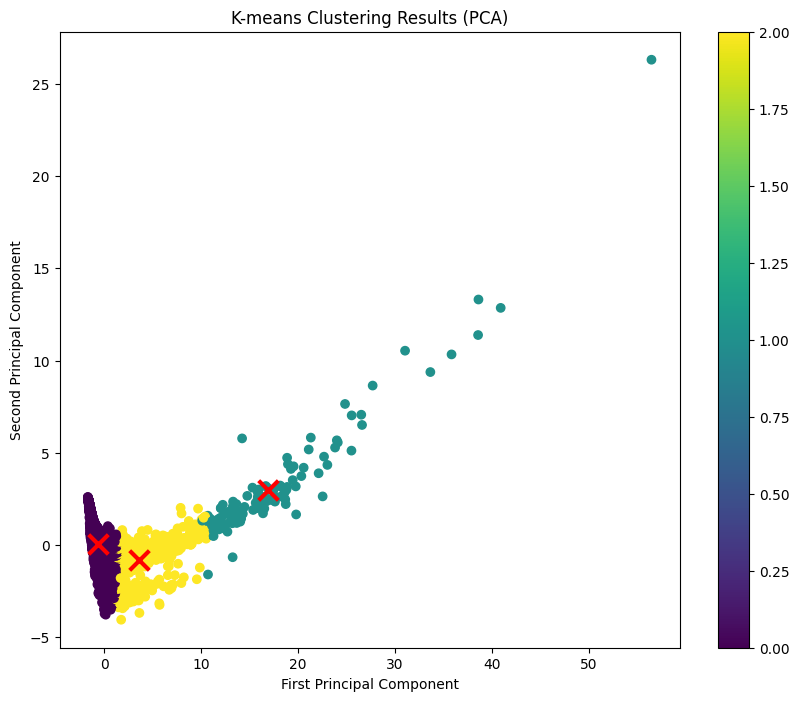

In [40]:
from sklearn.decomposition import PCA

# PCA ile boyut indirgeme
pca = PCA(n_components=2)
A_pca = pca.fit_transform(A_scaled)

# Kümeleri görselleştirme
plt.figure(figsize=(10, 8))
scatter = plt.scatter(A_pca[:, 0], A_pca[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.title('K-means Clustering Results (PCA)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Küme merkezlerini ekleme
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='x', s=200, linewidths=3)

plt.show()

In [41]:
silhouette_avg = silhouette_score(A_scaled, labels)
print(f"The average silhouette score is: {silhouette_avg}")

The average silhouette score is: 0.521682904451047


In [42]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [43]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

In [44]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])

In [45]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values